<a href="https://colab.research.google.com/github/Yureeets/Intelligent-analysis-and-visualization-of-data/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Тема: Дослідження розподілів та перевірка на нормальний розподіл

## **Завдання**:
1. Оберіть дані для аналізу
2. Перевірте дві змінні на нормально розподіленість трьома методами.
3. За допомогою перетворень спробуйте наблизити дані до нормального розподілу.
4. Зробити висновки щодо своїх даних.
5. Оформити звіт.

# **1. Оберіть дані для аналізу**

Отже для даної **лабораторної роботи** я обрав датасет, що містить в собі **інформацію про врожайності сільськогосподарських культур** в світі. Цей набір даних складається з **28242 записів** у семи колонках. Датасет складається з таких колонок як:
* Area (Країна)
* Item (Список типів продукції)
* Year (Рік)
* hg/ha_yiel (врожайність сільськогосподарських культур у гектограмах на гектар)
* average_rain_fall_mm_per_year (середньорічна кількість опадів у міліметрах)
* pesticides_tonnes (кількість використаних пестицидів, виміряна в тоннах)
* avg_temp (середня температура в градусах Цельсія)

Оскільки для виконання завдання потрібно взяти лише дві колонки, то ми будемо працювати лише з такими як: **hg/ha_yield** та **avg_temp**

## **Імпортуємо Бібліотеки**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

## **Імпортуємо Дані**

In [ ]:
# Завантажуємо з диску
!wget "https://drive.google.com/uc?export=download&id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX" -O filename.zip

--2024-09-19 17:20:44--  https://drive.google.com/uc?export=download&id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX&export=download [following]
--2024-09-19 17:20:44--  https://drive.usercontent.google.com/download?id=1eUsG37AlzIk9PkGM1t-3SIIBpB9S3QcX&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.164.1, 2607:f8b0:4025:803::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.164.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222032 (217K) [application/octet-stream]
Saving to: ‘filename.zip’

filename.zip        100%[===================>] 216.83K  --.-KB/s    in 0.04s   


In [ ]:
!unzip -q /content/filename.zip

replace yield_df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Імпортуємо Датасет
df = pd.read_csv('/content/yield_df.csv', index_col = 'Unnamed: 0')
df.head(8)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36


In [ ]:
# sns.histplot(df['Year'])
# df['average_rain_fall_mm_per_year']

Тепер залишемо лише потрібні нам колонки: **hg/ha_yield** та **avg_temp**

In [ ]:
df = df[['hg/ha_yield','avg_temp']]
df.head()

,hg/ha_yield,avg_temp
0,36613,16.37
1,66667,16.37
2,23333,16.37
3,12500,16.37
4,7000,16.37


In [ ]:
df.isnull().sum()

,0
hg/ha_yield,0
avg_temp,0


# **2. Перевірте дві змінні на нормально розподіленість трьома методами.**

Використаємо наступні методи:
* Візуальний метод - якщо гістограма має приблизно
«дзвоноподібну форму», то дані вважаються нормально розподіленими.

* Візуальний метод це діаграма Q-Q (графік квантиль-квантиль)

* Тест Колмогорова-Смирнова - якщо p-значення тесту більше α = 0,05, то дані вважаються
нормально розподіленими.

## **Візуальний Метод**
Відобразимо на графіку обидві змінні:

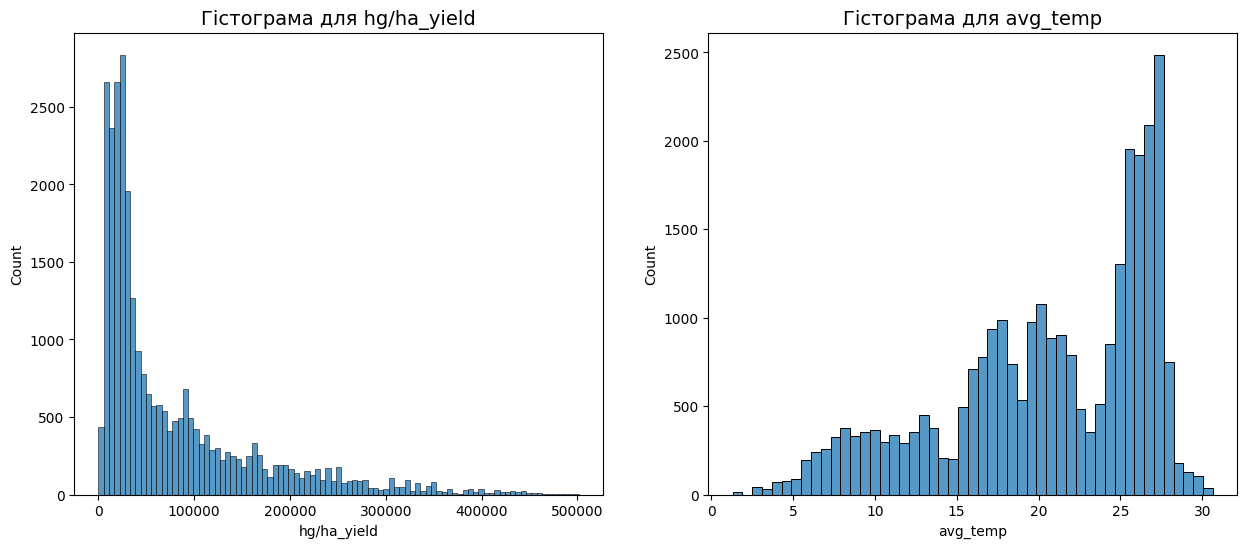

In [ ]:
plt.figure(figsize = (15,6))
for idx, column in enumerate(df.columns):
  plt.subplot(1,2,idx+1)
  sns.histplot(df[column])
  plt.title(f"Гістограма для {column}", fontsize = 14)

plt.show()

Як бачимо ні один з наших змінних не має **дзвоноподібну форму**, тому можемо вказати, що це не є **нормальним роподілом**.

## **Діаграма Q-Q (графік квантиль-квантиль)**

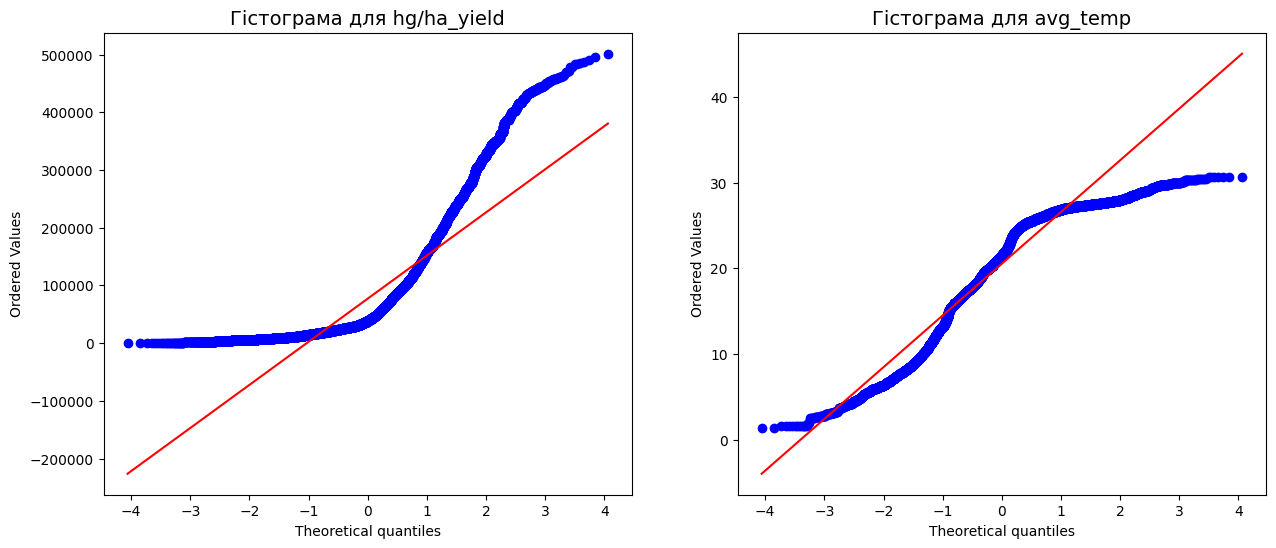

In [ ]:
plt.figure(figsize = (15,6))
for idx, column in enumerate(df.columns):
  plt.subplot(1,2,idx+1)
  scipy.stats.probplot(df[column],plot = plt)
  plt.title(f"Гістограма для {column}", fontsize = 14)

plt.show()

**hg/ha_yield:** Бачимо, що розподіл значно відхиляється від нормального, особливо на кінцях.

**avg_temp:** Цей графік показує менше відхилення від нормального розподілу, але все ж є деякі відхилення в обох кінцях.

Враховуючи попередні графіки можемо зробити висновок, що **hg/ha_yield** має значну кількість викидів та більше відрізняється від **нормального роподілу**, а **avg_temp** має складну структуру, що моде означати про наявність декількох окремих груп.

## **Тест Колмогорова-Смирнова**

Для цього скористаємося вбудованою функцією з scipy - **kstest**.

In [ ]:
scipy.stats.kstest(df['hg/ha_yield'].values, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=50, statistic_sign=-1)

Як бачимо для змінної **hg/ha_yield** - **pvalue=0.0**, що є меншим за **0.05**, а отже розподіл не нормально розподілений.



In [ ]:
scipy.stats.kstest(df['avg_temp'].values, 'norm')

KstestResult(statistic=0.997148451474951, pvalue=0.0, statistic_location=3.03, statistic_sign=-1)

Така ж ситуація для змінної **avg_temp** - **pvalue=0.0**, що є меншим за **0.05**, а отже розподіл не нормально розподілений.



# **3. За допомогою перетворень спробуйте наблизити дані до нормального розподілу.**

Серед операцій, які ми можемо спробувати для того, щоб наблизити наші дані до нормального розподілу можна виділити такі:

*   Логарифмічне перетворення
*   Перетворення квадратного кореня
*   Перетворення кубучного кореня

Тому спробуємо по порядку:



In [ ]:
operations = {
    'Логарифмічне перетворення': np.log,
    'Перетворення квадратного кореня': np.sqrt,
    'Перетворення кубічного кореня': lambda x: np.cbrt(x),
    'Від’ємний логарифм': lambda x: -np.log(x + 1e-9),
    'Зведення в квадрат': lambda x: np.power(x, 2),
    'Зведення в куб': lambda x: np.power(x, 3),
    # 'Піднесення до степеня 1/4': lambda x: np.power(x, 1/4),
    # 'Піднесення до степеня 1/5': lambda x: np.power(x, 1/5),
}

n = len(operations)+1
def plot_hist(column):
  index = 1
  plt.figure(figsize = (15,7))
  plt.subplot(1,n,index)
  sns.histplot(df[column])
  score = scipy.stats.kstest(df[column].values, 'norm')

  plt.title(f'{column}\n Score: {score[1]}',fontsize = 14)
  for operation in operations:
      index +=1
      plt.subplot(1,n,index)
      score = scipy.stats.kstest(operations[operation](df[column].values), 'norm')
      sns.histplot(operations[operation](df[column].values))

      plt.title(f'{operation}\n Score: {score[1]}',fontsize = 14)

  plt.tight_layout()
  plt.show()

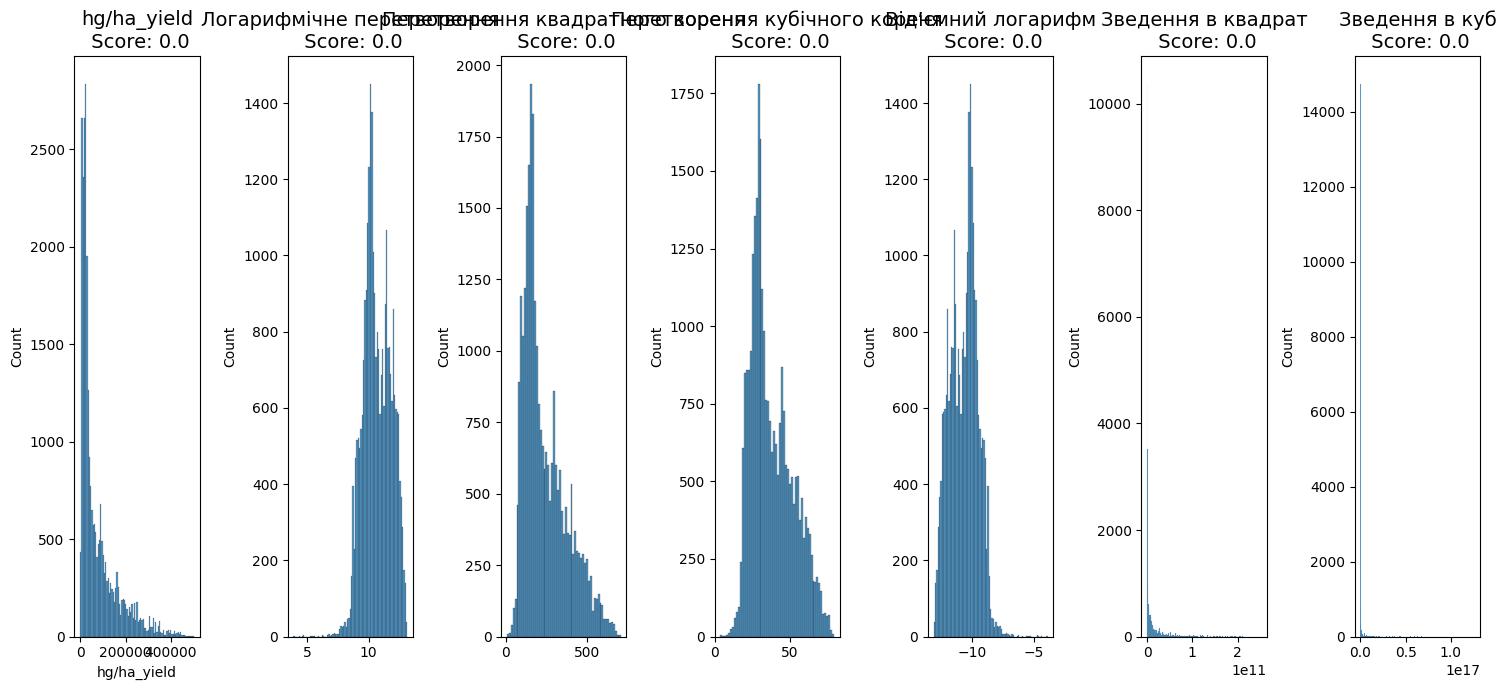

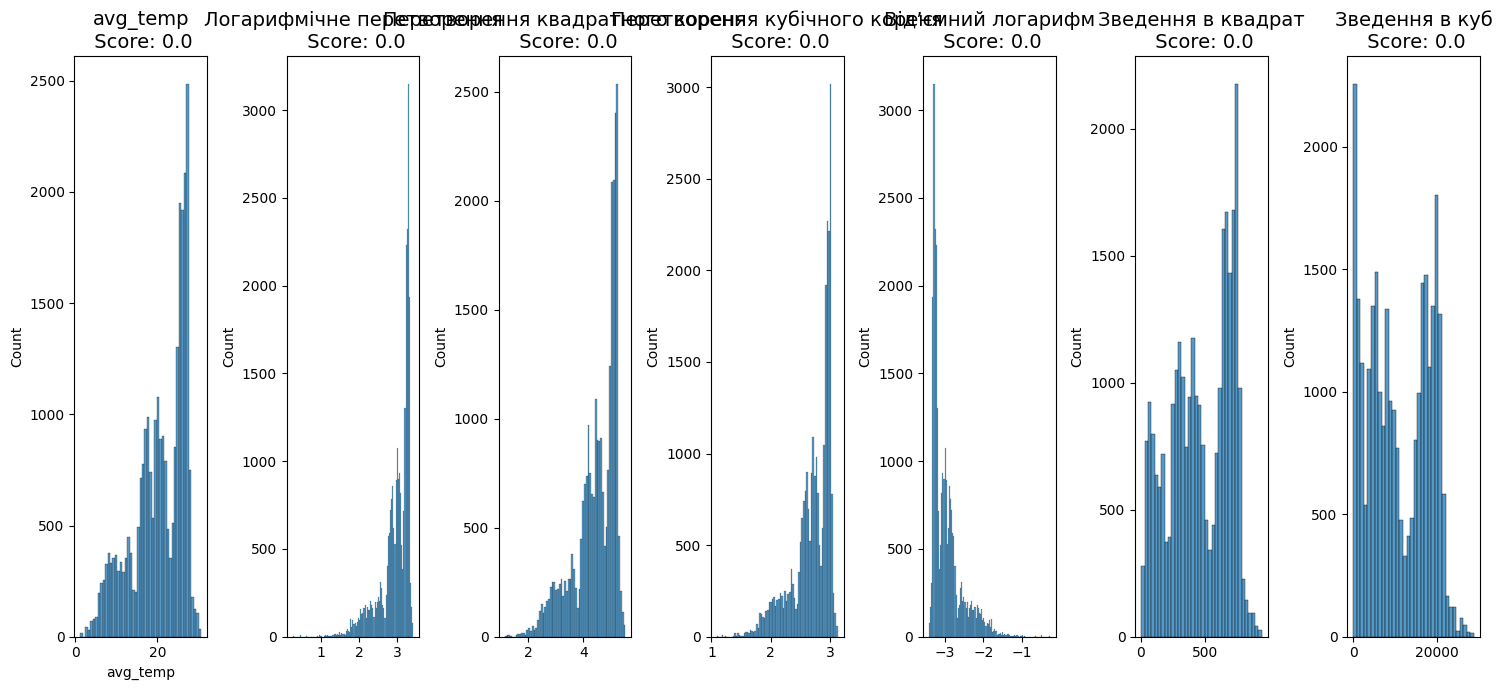

In [ ]:
for column in df.columns:
  plot_hist(column)


Як ми можемо побачити, для першої змінної **hg/ha_yield** є не суттєве покращення в сторону нормального розподілу, проте все ж не ідеально. Для змінної.

**avg_temp** покращення не відбулося, отже це свідчить про те, що дані потребують іншого підходу для трансформації. Має структурні особливості, які не піддаються виправленню через стандартні математичні перетворення. Необхідно розглянути більш складні методи.

# **Висновок**

У даній лабораторній роботі було виконано аналіз нормального розподілу для двох змінних: **hg/ha_yield** та **avg_temp**. Основною метою було оцінити, наскільки розподіли цих змінних відповідають нормальному розподілу, і здійснити необхідні трансформації для покращення відповідності.

Для цього були застосовані стандартні математичні методи трансформації даних з метою нормалізації розподілів, а також було проведено візуалізацію результатів для оцінки ефективності цих перетворень.

Висновки
**hg/ha_yield**: Після застосування перетворень було досягнуто незначного покращення в напрямку нормального розподілу, однак розподіл все ще не є ідеальним.

**avg_temp**: Для цієї змінної покращення розподілу не відбулося. Це вказує на те, що застосовані методи не є ефективними для нормалізації даних і, можливо, потрібні більш складні підходи або методи перетворення.
Загалом, результати свідчать про необхідність більш глибокого аналізу структури даних та використання складніших методів трансформації для досягнення нормального розподілу.